# <p style="background-color:#B0766D;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Zomato Dataset Exploratory Data analysis</p>
<img src="https://raw.githubusercontent.com/chiragsamal/Zomato/master/Images/zomato.jpg">

# <p style="background-color:#B0766D;font-family:newtimeroman;color:#FFF9ED;font-size:100%;text-align:center;border-radius:10px 10px;">Importing Important Libraries</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# <p style="background-color:#B0766D;font-family:newtimeroman;color:#FFF9ED;font-size:100%;text-align:center;border-radius:10px 10px;">Improve our domain Knowledge about Zomato</p> 
### Lets Talks about Zomato and Familiar more about it:

* Zomato has Launched in 2010, its technology platform connects customers, restaurant partners and delivery partners, serving their multiple needs.
* Customers use its platform to search and discover restaurants, read and write customer generated reviews and view and upload photos, order food delivery, book a table and make payments while dining-out at restaurants. 
* On the other hand, it provides restaurant partners with industry-specific marketing tools which enable them to engage and acquire customers to grow their business while also providing a reliable and efficient last mile delivery service.
*Its team also operate a one-stop procurement solution, Hyperpure, which supplies high quality ingredients and kitchen products to restaurant partners. Zomato' team also provide our delivery partners with transparent and flexible earning opportunities.

* In the following code I use encoding = latin-1:<br>

It maps all possible byte values to the first 256 Unicode code points, and thus ensures decoding errors will never occur regardless of the configured error handler</br>
* Use pandas documentation to find and explore whatever you like to search..
https://pandas.pydata.org/docs/

Zomato Restaurant contains the following variables:

• **Restaurant Id:** Unique id of every restaurant across various cities of the world<br>
• **Restaurant Name:** Name of the restaurant<br>
• **Country Code:** Country in which restaurant is located<br>
• **City:** City in which restaurant is located<br>
•**Address:** Address of the restaurant<br>
• **Locality:** Location in the city<br>
• **Locality Verbose:** Detailed description of the locality<br>
• **Longitude:** Longitude coordinate of the restaurant's location<br>
• **Latitude:** Latitude coordinate of the restaurant's location<br>
• **Cuisines:** Cuisines offered by the restaurant<br>
• **Average Cost for two:** Cost for two people in different currencies<br>
• **Currency:** Currency of the country<br>
• **Has Table booking:** yes/no<br>
• **Has Online delivery:** yes/ no<br>
• **Is delivering:** yes/ no<br>
• **Switch to order menu:** yes/no<br>
• **Price range:** range of price of food<br>
• **Aggregate Rating:** Average rating out of 5<br>
• **Rating color:** depending upon the average rating color<br>
• **Rating text:** text on the basis of rating of rating<br>
• **Votes:** Number of ratings casted by people<br>

In [2]:
df = pd.read_csv(r'D:\Python\EDA\Zomato\Zomato\zomato.csv', encoding ='latin-1')
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [3]:
df.shape

(9551, 21)

In [4]:
#Knowing my culomns
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

Lets go to find out the number of observations and columns of Zomato Restaurant Dataset.

# In Data Analysis we do:
1. Missing Values
2. Explore about Numerical Valuables
3. Explore about Categorical valuables
4. Finding Relationship Between  Features

#### The value between in 9551 is too small so did not show in heatmap

In [5]:
df_country = pd.read_excel(r'D:\Python\EDA\Zomato\Zomato\Country-Code.xlsx')
df_country

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [6]:
df_country.shape

(15, 2)

## At the moment I merge df, df_country where their country code are the same

In [7]:
Final_df=pd.merge(df, df_country, on= 'Country Code', how= 'left')
Final_df.head(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,No,No,No,No,3,4.4,Green,Very Good,336,Phillipines
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Yes,No,No,No,4,4.0,Green,Very Good,520,Phillipines
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Yes,No,No,No,4,4.2,Green,Very Good,677,Phillipines
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Yes,No,No,No,4,4.9,Dark Green,Excellent,621,Phillipines
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Yes,No,No,No,3,4.8,Dark Green,Excellent,532,Phillipines


In [8]:
Final_df.shape

(9551, 22)

In [9]:
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [10]:
Final_df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [11]:
Final_df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [12]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

In [13]:
Final_df.duplicated().sum()

0

In [14]:
cat_cols=Final_df.select_dtypes(include=['object']).columns
num_cols = Final_df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text', 'Country'],
      dtype='object')
Numerical Variables:
['Restaurant ID', 'Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']


In [15]:
# Pairplot for numerical variables
sns.pairplot(Final_df.select_dtypes(include='number'))
plt.show()

In [ ]:
print('Here, there is a list of Zomato country:')
for i in pd.unique(Final_df.Country): print(i)
print('Total number of countries is:', len(pd.unique(Final_df.Country)))

Here, there is a list of Zomato country:
Phillipines
Brazil
United States
Australia
Canada
Singapore
UAE
India
Indonesia
New Zealand
United Kingdom
Qatar
South Africa
Sri Lanka
Turkey
Total number of countries is: 15


### Lets go to Explorer Dataset, Lets pick up something
 ##### How many countries are there?

In [ ]:
Final_df.Country.value_counts()

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: count, dtype: int64

### Maximum Transaction happen in India by 8652

In [ ]:
country_name = Final_df.Country.value_counts().index
country_name 

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object', name='Country')

In [ ]:
country_val = Final_df.Country.value_counts().values
country_val

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4], dtype=int64)

### Lets do some Plots

### 1- Top 3 Countries that uses Zomato

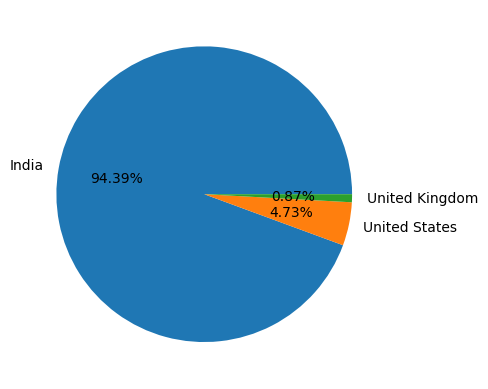

In [ ]:
plt.pie(country_val[:3], labels=country_name[:3],autopct ='%1.2f%%');

##### Observation:Zomato Maximum Records are from India After that USA and then United Kingdom

In [ ]:
rating = Final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
rating

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


#### Observation:
When Rating is between 4.5 to 4.9 it means Excellent <br>
When Rating is between 4.0 to 4.4 it means Very Good <br>
When Rating is between 3.5 to 3.9 it means Good <br>
When Rating is between 2.5 to 3.4 it means Average <br>
When Rating is between 2.0 to 2.4 it means Poor 

In [ ]:
Rate = rating.groupby('Rating text')['Rating Count'].sum()
Rate

Rating text
Average      3737
Excellent     301
Good         2100
Not rated    2148
Poor          186
Very Good    1079
Name: Rating Count, dtype: int64

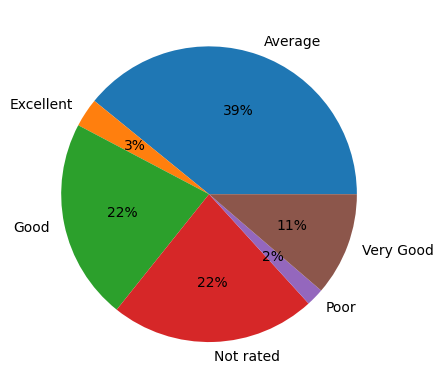

In [ ]:
plt.pie(Rate, labels=Rate.index, autopct='%1.f%%')
plt.show()

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

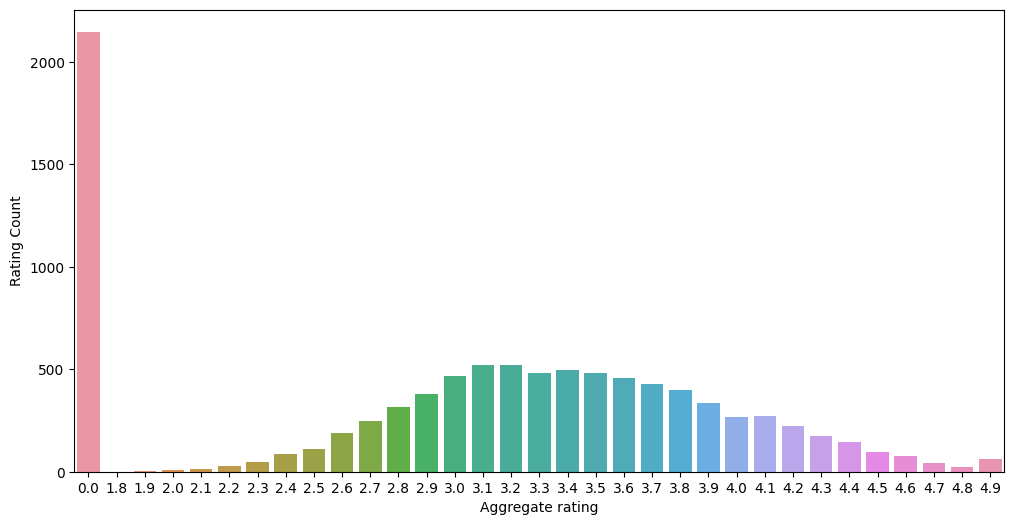

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,6)
sns.barplot(x= 'Aggregate rating', y='Rating Count', data= rating)

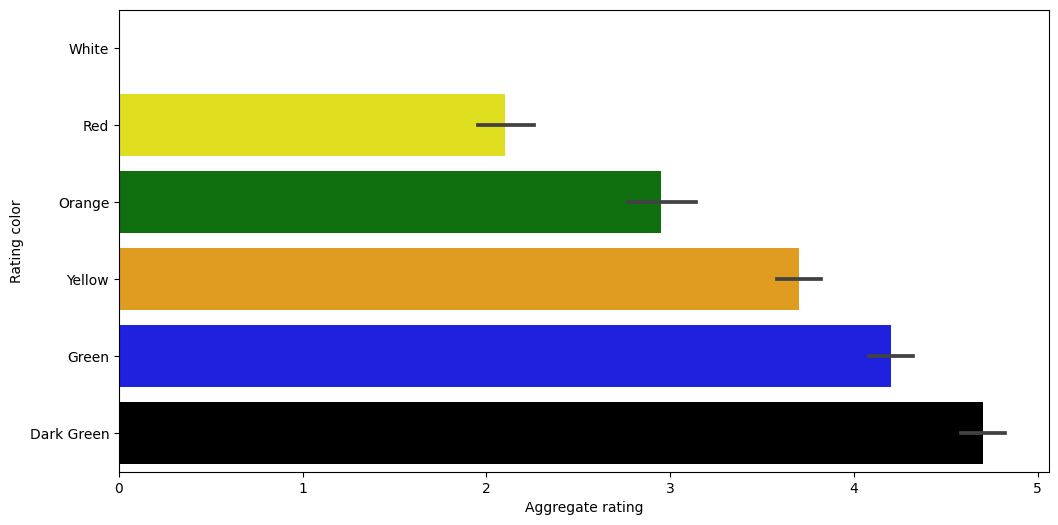

In [ ]:
sns.barplot(x= 'Aggregate rating', y='Rating color', data= rating, palette=['white', 'yellow', 'green', 'orange','blue','black']);

### Observation: 
1- Not Rated count is very high<br>
2- Maximum Number of rating are between 2.5 to 3.6

<Axes: xlabel='Rating color', ylabel='count'>

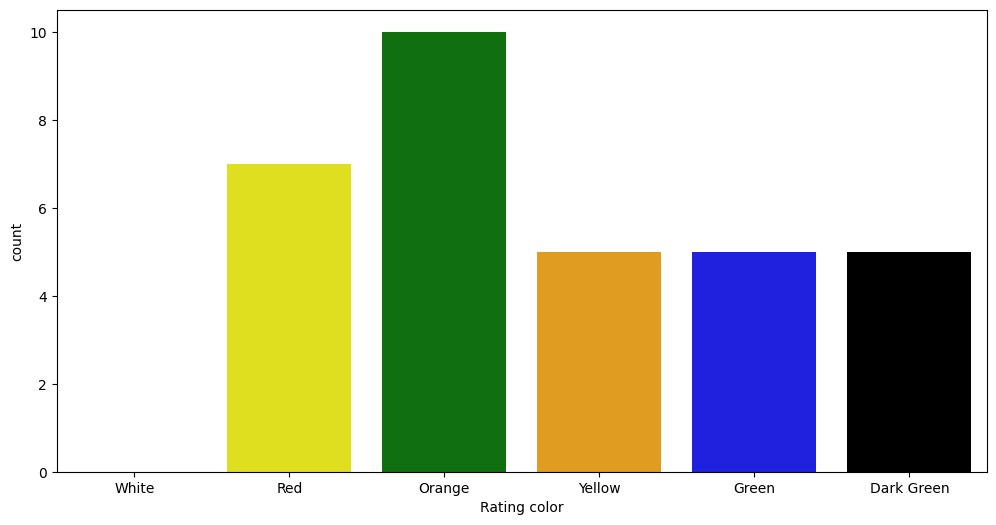

In [ ]:
## Countplot
sns.countplot(x='Rating color', data= rating, palette= ['white', 'yellow', 'green', 'orange','blue','black'])

### Find country names that have given zero rating

In [ ]:
Final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [ ]:
len(Final_df[Final_df['Rating color']== 'White'])

2148

In [ ]:
Final_df[Final_df['Rating color']== 'White'].groupby(['Aggregate rating','Country']).size().reset_index()

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3


## Observation:
Maximum number of 0 ratings are from India customers

In [ ]:
## find out which currency is used by which country
Final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

## find out which currency is used by which country

In [ ]:
Final_df[['Country','Currency']].groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


## Which countries do have online deliveries

In [ ]:
Final_df[Final_df['Has Online delivery']=='Yes'].Country.value_counts()

Country
India    2423
UAE        28
Name: count, dtype: int64

In [ ]:
Final_df[['Has Online delivery', 'Country']].groupby(['Has Online delivery','Country']).size().reset_index()

,Has Online delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


## Observation
Online deliveries are available in India and UAE

In [ ]:
## Create a pie chart for cities distribution
city_values=Final_df.City.value_counts().values
city_labels=Final_df.City.value_counts().values

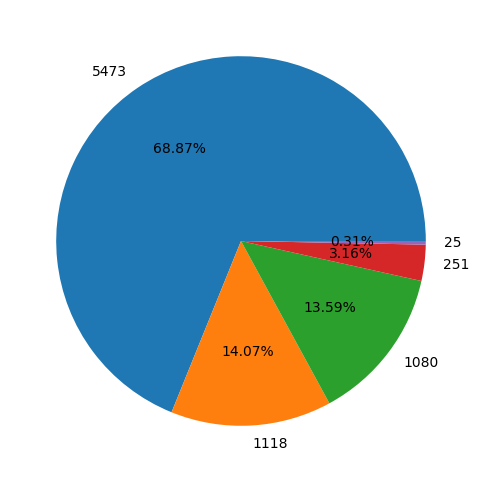

In [ ]:
plt.pie(city_values[:5],labels=city_labels[:5], autopct='%1.2f%%');

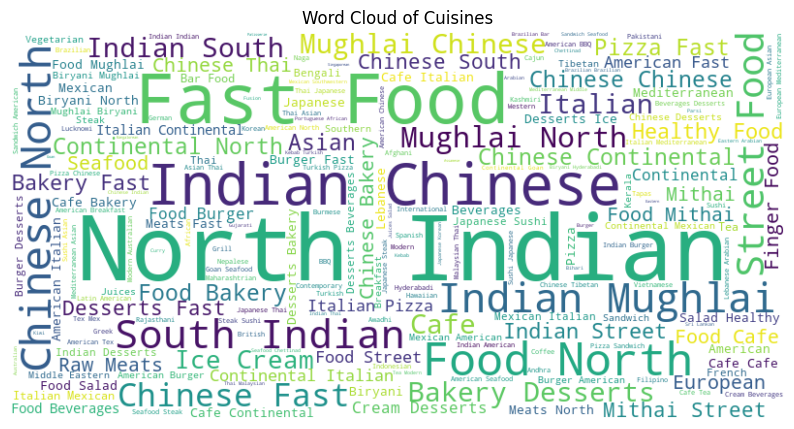

In [ ]:
# Word cloud for cuisines
from wordcloud import WordCloud

cuisines_text = ' '.join(Final_df['Cuisines'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cuisines_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Cuisines')
plt.axis('off')
plt.show()

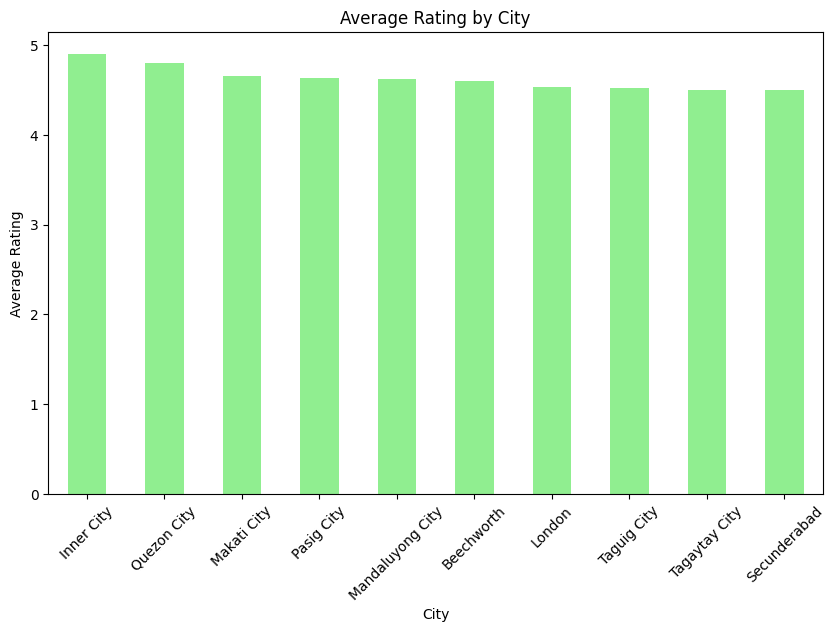

In [ ]:
# Average rating by city
avg_rating_by_city = Final_df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
avg_rating_by_city.plot(kind='bar', color='lightgreen')
plt.title('Average Rating by City')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

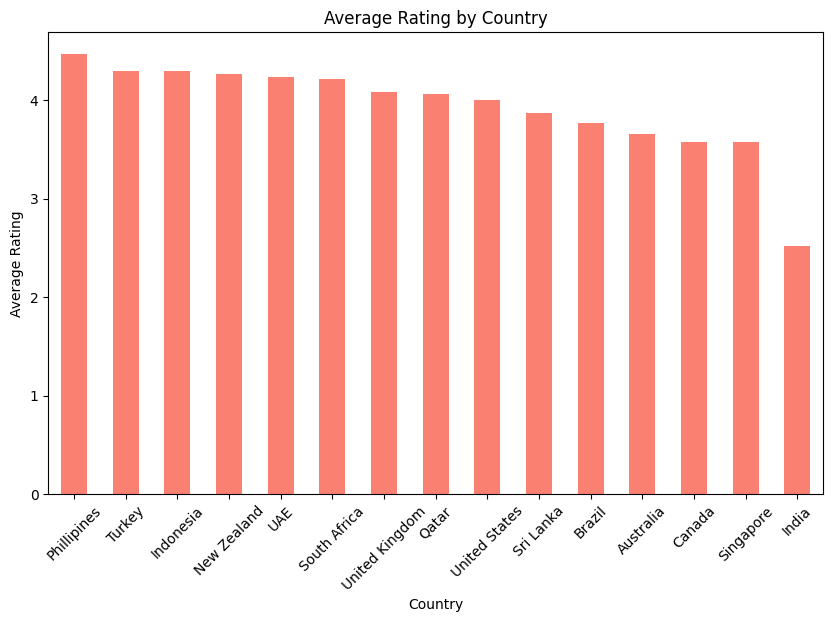

In [ ]:
# Average rating by country
avg_rating_by_country = Final_df.groupby('Country')['Aggregate rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
avg_rating_by_country.plot(kind='bar', color='salmon')
plt.title('Average Rating by Country')
plt.xlabel('Country')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5452\3021016381.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Price range', y='Aggregate rating', hue='Country', data=Final_df, ci=None)


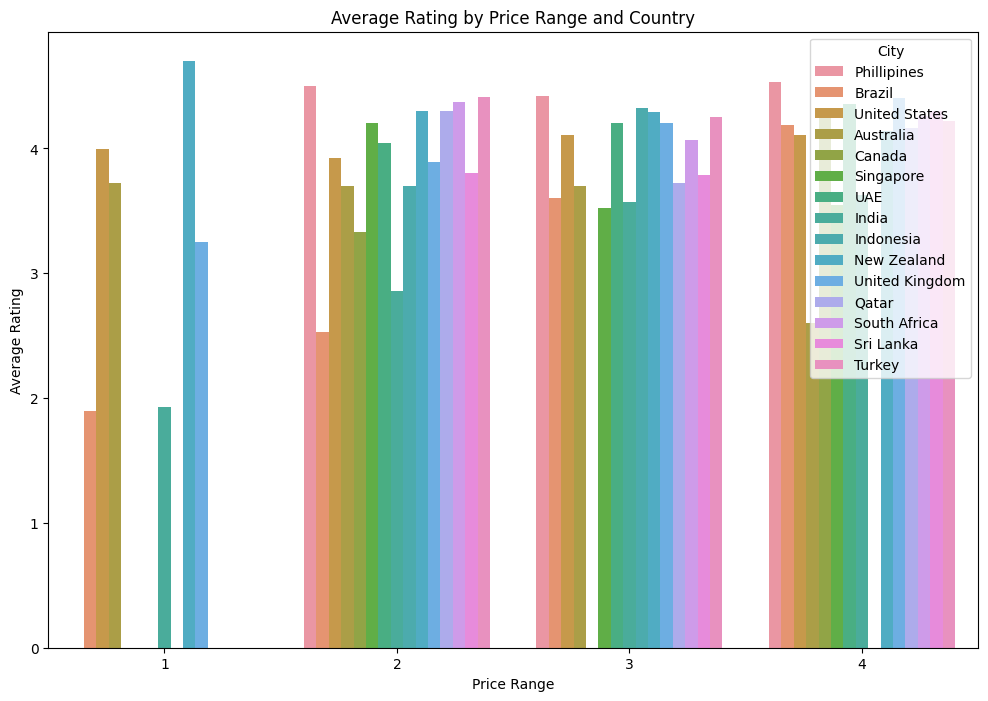

In [ ]:
# Average rating by price range and city
plt.figure(figsize=(12, 8))
sns.barplot(x='Price range', y='Aggregate rating', hue='Country', data=Final_df, ci=None)
plt.title('Average Rating by Price Range and Country')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.legend(title='City', loc='upper right')
plt.show()

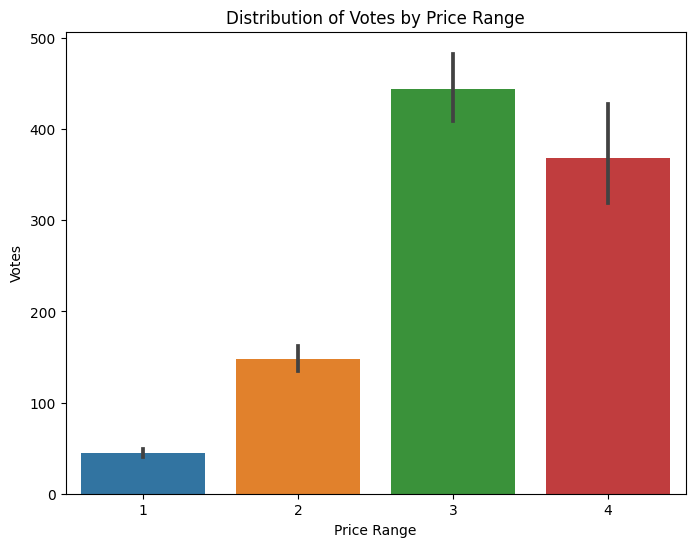

In [ ]:
# Distribution of votes by price range
plt.figure(figsize=(8, 6))
sns.barplot(x='Price range', y='Votes', data=Final_df)
plt.title('Distribution of Votes by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Votes')
plt.show()

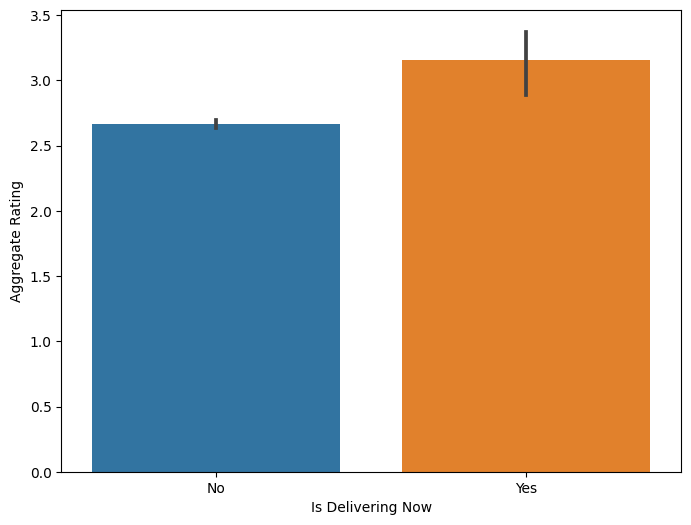

In [ ]:
# Relationship between rating and whether the restaurant is delivering now
plt.figure(figsize=(8, 6))
sns.barplot(x='Is delivering now', y='Aggregate rating', data=Final_df)
plt.xlabel('Is Delivering Now')
plt.ylabel('Aggregate Rating')
plt.show()

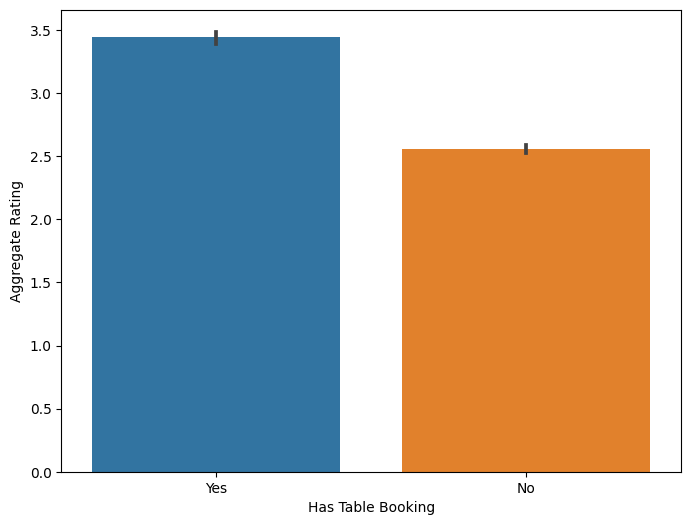

In [ ]:
# Box plot of aggregate rating by table booking availability
plt.figure(figsize=(8, 6))
sns.barplot(x='Has Table booking', y='Aggregate rating', data=Final_df)
plt.xlabel('Has Table Booking')
plt.ylabel('Aggregate Rating')
plt.show()